In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm
import sys

from scipy.optimize import linprog

# Question 2

In [2]:
GRID_SIZE = 5
A, A_d = (0,1), (4,1)
B, B_d = (0,3), (2,3)

gamma = 0.9 # Given
pi_action = [0.25, 0.25, 0.25, 0.25] # Policy function
actions = [(-1,0), (1,0), (0,1), (0, -1)] # Set of actions i.e. left, right, up, down

In [3]:
num_states = GRID_SIZE * GRID_SIZE # Every cell is a state

In [4]:
def inside(GRID_SIZE, new_location):
    H,W = GRID_SIZE, GRID_SIZE
    if(new_location[0]<0):
        return False
    if(new_location[0]>=H):
        return False
    if(new_location[1]<0):
        return False
    if(new_location[1]>=W):
        return False
    return True

In [5]:
def create_equations(actions, pi_action):
    mat_A = np.zeros((num_states, num_states)) # matrix (A)
    mat_B = np.zeros((num_states,1)) # vector (b), to solve Ax=b
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            pos = i * GRID_SIZE + j
            if (i,j) == A: # Special case if agent is at (0,1), new state = (4,1), reward = 10
                new_location = A_d[0] * GRID_SIZE + A_d[1]
                mat_A[pos, new_location] -= gamma 
                mat_B[pos] += 10
            elif (i,j) == B: # Special case if agent is at (0,3), new state = (2,3), reward = 5
                new_location = B_d[0] * GRID_SIZE + B_d[1]
                mat_A[pos, new_location] -= gamma
                mat_B[pos] += 5
            else:
                for k in range(len(actions)):
                    # For every action, agent goes to a state
                    # i.e. if action = right at state (0,0) then agent goes to (0,1) and has reward 0 with prob = 1
                    new_location = i + actions[k][0], j + actions[k][1]
                    if inside(GRID_SIZE, new_location):
                        pos_2 = new_location[0] * GRID_SIZE + new_location[1]
                        mat_A[pos,pos_2] -= pi_action[k] * gamma
                        mat_B[pos] += 0
                    else:
                        mat_A[pos,pos] -= pi_action[k] * gamma
                        mat_B[pos] += -1 * pi_action[k]
            mat_A[pos,pos] += 1
    return mat_A, mat_B

In [6]:
A, b = create_equations(actions, pi_action)

In [7]:
value_function = np.linalg.solve(A, b)
value_function = np.reshape(value_function, (GRID_SIZE,GRID_SIZE))
np.set_printoptions(precision=1)
value_function

array([[ 3.3,  8.8,  4.4,  5.3,  1.5],
       [ 1.5,  3. ,  2.3,  1.9,  0.5],
       [ 0.1,  0.7,  0.7,  0.4, -0.4],
       [-1. , -0.4, -0.4, -0.6, -1.2],
       [-1.9, -1.3, -1.2, -1.4, -2. ]])

# Question 4

In [8]:
np.set_printoptions(precision=8)

In [9]:
GRID_SIZE = 5
A, A_d = (0,1), (4,1)
B, B_d = (0,3), (2,3)

gamma = 0.9 # Given
pi_action = [1, 1, 1, 1] # Policy function
actions = [(-1,0), (1,0), (0,1), (0, -1)] # Set of actions i.e. left, right, up, down

In [10]:
num_states = GRID_SIZE * GRID_SIZE # Every cell is a state

In [11]:
def create_equations(actions, pi_action):
    mat_A = np.zeros((num_states * len(actions), num_states)) # matrix (A)
    mat_B = np.zeros((num_states * len(actions),1)) # vector (b), to solve Ax=b
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            pos = i * GRID_SIZE + j
            if (i,j) == A: # Special case if agent is at (0,1), new state = (4,1), reward = 10
                new_location = A_d[0] * GRID_SIZE + A_d[1]
                for k in range(len(actions)):
                    mat_A[pos + k, new_location] -= gamma 
                    mat_B[pos + k] += 10
            elif (i,j) == B: # Special case if agent is at (0,3), new state = (2,3), reward = 5
                new_location = B_d[0] * GRID_SIZE + B_d[1]
                for k in range(len(actions)):
                    mat_A[pos + k, new_location] -= gamma
                    mat_B[pos + k] += 5
            else:
                for k in range(len(actions)):
                    new_location = i + actions[k][0], j + actions[k][1]
                    if inside(GRID_SIZE, new_location):
                        pos_2 = new_location[0] * GRID_SIZE + new_location[1]
                        mat_A[pos + k, pos_2] -= pi_action[k] * gamma
                        mat_B[pos + k] += 0
                    else:
                        mat_A[pos + k, pos] -= pi_action[k] * gamma
                        mat_B[pos + k] += -1 * pi_action[k]
            for k in range(len(actions)):
                mat_A[pos + k, pos] += 1
    return mat_A * -1, mat_B * -1

In [12]:
mA, mb = create_equations(actions, pi_action)

In [13]:
C = np.ones((num_states,1)) * -1
value_function = linprog(C, A_ub=mA, b_ub=mb)
value_function

     con: array([], dtype=float64)
     fun: -501.1865808837265
 message: 'Optimization failed. The problem appears to be unbounded.'
     nit: 41
   slack: array([ 3.27699169e+00, -1.24344979e-14, -1.42108547e-14,  8.15628650e+00,
        1.19015908e-13, -1.03739239e-12, -6.07514039e-13,  6.27053964e-13,
        5.32907052e-13,  1.52766688e-13,  3.11653462e+01, -7.81597009e-14,
       -1.42108547e-14,  7.10542736e-15,  9.23705556e-14,  1.24344979e-13,
        3.68722465e+01, -9.23705556e-14, -3.19744231e-14,  5.28805001e+01,
        1.59872116e-14, -1.68753900e-14, -4.61852778e-14,  9.61762502e+00,
       -1.42108547e-14, -2.13162821e-14, -7.32747196e-15, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000

# Question 6

In [14]:
GRID_SIZE = 4
terminal_states = [(0,0), (3,3)]
num_states = GRID_SIZE * GRID_SIZE

gamma = 1.0 # Given
actions = [(-1,0), (1,0), (0,1), (0, -1)] # Set of actions i.e. left, right, up, down

In [15]:
def argmax(expected_return):
    indices = []
    max_val = np.max(expected_return)
    for i in range(expected_return.shape[0]):
        if expected_return[i] == max_val:
            indices.append(i)
    indices = np.array(indices)
    indices = np.reshape(indices, (indices.shape[0],1))
    indices = indices.astype(np.uint8)
    return indices

### Using policy interation

In [16]:
V_s = np.zeros((num_states,1)) # Initialization of the value function
pi_action = np.ones((num_states,4)) * 0.25
tolerance = 0.1

policy_stable = False
while not policy_stable:
    
    # Policy evaluation
    while True:
        delta = 0.0
        v_s = np.copy(V_s)
        V_s = np.zeros(V_s.shape)
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i,j) in terminal_states:
                    continue
                else:
                    s = i * GRID_SIZE + j
                    for k in range(len(actions)):
                        new_location = i + actions[k][0], j + actions[k][1]
                        if inside(GRID_SIZE, new_location):
                            new_s = new_location[0] * GRID_SIZE + new_location[1]
                            V_s[s] += (-1 + gamma * v_s[new_s]) * pi_action[s][k]
                        else:
                            V_s[s] += (-1 + gamma * v_s[s]) * pi_action[s][k]
                    delta = max(delta, np.absolute(V_s[s] - v_s[s]))
        if delta < tolerance:
            break
    
    print('Update value function for policy\n', V_s.reshape((GRID_SIZE,GRID_SIZE)))
            
    # Policy improvement
    old_policy = np.copy(pi_action)
    pi_action = np.zeros(pi_action.shape)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i,j) in terminal_states:
                continue
            else:
                s = i * GRID_SIZE + j
                expected_return = np.zeros((len(actions),1))
                for k in range(len(actions)):
                    new_location = i + actions[k][0], j + actions[k][1]
                    if inside(GRID_SIZE, new_location):
                        new_s = new_location[0] * GRID_SIZE + new_location[1]
                        expected_return[k] = (-1 + gamma * V_s[new_s])
                    else:
                        expected_return[k] = (-1 + gamma * V_s[s])
                best_actions = argmax(expected_return)
                pi_action[s][best_actions] = 1
                pi_action[s,:] /= np.sum(pi_action[s,:])
    print('Updated policy using new value function\n', pi_action)
    if np.all(pi_action == old_policy):
        print('\n\n***Found optimal policy***\n\n')
        break
    print('\n\n ***Iteration Complete, still searching for optimal policy***\n\n')

print('The optimal policy is\n')
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        print('{}: {}'.format((i,j), pi_action[i*GRID_SIZE+j]))
        
print("\nOrder of actions is down, up, right, left")

Update value function for policy
 [[  0.         -12.95986164 -18.45870225 -20.27519666]
 [-12.95986164 -16.64220783 -18.46901249 -18.45870225]
 [-18.45870225 -18.46901249 -16.64220783 -12.95986164]
 [-20.27519666 -18.45870225 -12.95986164   0.        ]]
Updated policy using new value function
 [[0.  0.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  1. ]
 [0.  0.5 0.  0.5]
 [1.  0.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.5 0.  0.5]
 [0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  1.  0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0. ]]


 ***Iteration Complete, still searching for optimal policy***


Update value function for policy
 [[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
Updated policy using new value function
 [[0.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.5  0.   0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   1.   0.   0. 

### Using value iteration

In [17]:
V_s = np.zeros((num_states,1)) # Initialization of the value function
pi_action = np.ones((num_states,4)) * 0.25
tolerance = 0.1

while True:
    delta = 0.0
    v_s = np.copy(V_s)
    V_s = np.zeros(V_s.shape)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            s = i * GRID_SIZE + j
            if (i,j) in terminal_states:
                continue
            else:
                expected_return = np.zeros((len(actions),1))
                for k in range(len(actions)):
                    new_location = i + actions[k][0], j + actions[k][1]
                    if inside(GRID_SIZE, new_location):
                        s_new = new_location[0] * GRID_SIZE + new_location[1]
                        expected_return[k] = (-1 + gamma * v_s[s_new])
                    else:
                        expected_return[k] = (-1 + gamma * v_s[s])
                V_s[s] = np.max(expected_return)
                
                delta = max(delta, np.absolute(V_s[s] - v_s[s]))
    
    print('Update value function for policy\n', V_s.reshape((GRID_SIZE,GRID_SIZE)))
    
    if delta < tolerance:
        print('\n\n***Found oprimal value function***\n\n')
        break
    print('\n\n ***Iteration Complete, still searching for optimal value function***\n\n')
    
pi_action = np.zeros(pi_action.shape)
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i,j) in terminal_states:
            continue
        else:
            s = i * GRID_SIZE + j
            expected_return = np.zeros((len(actions),1))
            for k in range(len(actions)):
                new_location = i + actions[k][0], j + actions[k][1]
                if inside(GRID_SIZE, new_location):
                    new_s = new_location[0] * GRID_SIZE + new_location[1]
                    expected_return[k] = (-1 + gamma * V_s[new_s])
                else:
                    expected_return[k] = (-1 + gamma * V_s[s])
            best_actions = argmax(expected_return)
            pi_action[s][best_actions] = 1
            pi_action[s,:] /= np.sum(pi_action[s,:])
            
print('The optimal policy is\n')
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        print('{}: {}'.format((i,j), pi_action[i*GRID_SIZE+j]))
        
print("\nOrder of actions is down, up, right, left")

Update value function for policy
 [[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]


 ***Iteration Complete, still searching for optimal value function***


Update value function for policy
 [[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -1.]
 [-2. -2. -1.  0.]]


 ***Iteration Complete, still searching for optimal value function***


Update value function for policy
 [[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


 ***Iteration Complete, still searching for optimal value function***


Update value function for policy
 [[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


***Found oprimal value function***


The optimal policy is

(0, 0): [0. 0. 0. 0.]
(0, 1): [0. 0. 0. 1.]
(0, 2): [0. 0. 0. 1.]
(0, 3): [0.  0.5 0.  0.5]
(1, 0): [1. 0. 0. 0.]
(1, 1): [0.5 0.  0.  0.5]
(1, 2): [0.25 0.25 0.25 0.25]
(1, 3): [0. 1. 0. 0.]
(2, 0): [1. 0. 0. 0.]
(2, 1): [0.25 0.25 0.25 0.25]
(2, 2): [0.  0.5 0.5 0. ]
(2

# Question 7

### Original Jack's Car Rental Problem with Max. Number of Cars = 10

In [18]:
num_cars = 10
num_states = (num_cars + 1) * (num_cars + 1)

num_rentals_1 = 3
num_returns_1 = 3

num_rentals_2 = 4
num_returns_2 = 2

r_rent = 10
r_move = -2

max_move = 5

gamma = 0.9

In [19]:
def poisson(x, lamb):
    p = np.exp(-lamb) * np.power(lamb, x) / np.math.factorial(x)
    return p

In [20]:
def expected_return(state, action, value_function):
    e_return = 0.0
    e_return += r_move * np.absolute(action)
    new_state = min(state[0] - action, num_cars), min(state[1] + action, num_cars)
    new_state = int(new_state[0]), int(new_state[1])
    for i in range(0, new_state[0] + 1):
        for j in range(0, new_state[1] + 1):
            p_rent = poisson(i, num_rentals_1) * poisson(j, num_rentals_2)
            rent_reward = (i + j) * r_rent
            for k in range(0, 11):
                for l in range(0, 11):
                    p_return = poisson(k, num_returns_1) * poisson(l, num_returns_2)
                    final_state = new_state[0] - i + k, new_state[1] - j + l
                    final_state = min(final_state[0], num_cars), min(final_state[1], num_cars)
                    n_s = final_state[0] * (num_cars + 1) + final_state[1]
                    e_return += p_return * p_rent * (rent_reward + gamma * value_function[int(n_s)])
    
    return e_return

In [21]:
V_s = np.zeros((num_states,1)) # Value functions for all states
pi_action = np.zeros((num_cars + 1, num_cars + 1)) # Initial policy to not move any cars
tolerance = 1.0e-1

policy_stable = False
while not policy_stable:
    # Policy evaluation
    while True:
        delta = 0.0
        v_s = np.copy(V_s)
        V_s = np.zeros(V_s.shape)
        for i in range(num_cars + 1):
            for j in range(num_cars + 1):
                s = i * (num_cars + 1) + j
                V_s[s] = expected_return((i,j), pi_action[i,j], V_s)
                delta = max(delta, V_s[s] - v_s[s])
        if delta < tolerance:
            break
            
    print('Update value function for policy\n', V_s.reshape((num_cars + 1,num_cars + 1)))
    
    # Policy improvement
    old_policy = np.copy(pi_action)
    pi_action = np.zeros(pi_action.shape)
    for i in range(num_cars + 1):
        for j in range(num_cars + 1):
            s = i * (num_cars + 1) + j
            actions = np.arange(-max_move, max_move + 1)
            actions = np.reshape(actions, (actions.shape[0],1))
            all_return = np.zeros(actions.shape)
            for k in range(actions.shape[0]):
                if ((actions[k] >= 0 and i >= actions[k]) or (actions[k] < 0 and j >= np.absolute(actions[k]))):
                    all_return[k] = expected_return((i,j), actions[k], V_s)
                else:
                    all_return[k] = -np.inf
            pi_action[i,j] = actions[np.argmax(all_return)]
    
    print('Updated policy using new value function\n', pi_action.reshape(num_cars + 1, num_cars + 1))
    if np.all(pi_action == old_policy):
        print('\n\n***Found optimal policy***\n\n')
        break
    print('\n\n ***Iteration Complete, still searching for optimal policy***\n\n')

Update value function for policy
 [[0.00000000e+00 3.64643126e-02 1.82325596e-01 4.74083652e-01
  8.63191911e-01 1.25245145e+00 1.56404443e+00 1.77197599e+00
  1.89099401e+00 1.95067999e+00 1.97734863e+00]
 [2.73843741e-02 2.82814957e-01 1.08579509e+00 2.54781630e+00
  4.40497724e+00 6.21135405e+00 7.63448754e+00 8.57839708e+00
  9.12122426e+00 9.39882705e+00 9.52825420e+00]
 [1.10516959e-01 8.63466228e-01 2.99486518e+00 6.68766832e+00
  1.12629753e+01 1.56674100e+01 1.91436460e+01 2.14870081e+01
  2.28850654e+01 2.36494510e+01 2.40465709e+01]
 [2.39953347e-01 1.67960152e+00 5.53392157e+00 1.20324552e+01
  1.99977826e+01 2.76766833e+01 3.38235499e+01 3.80975988e+01
  4.07895559e+01 4.23890469e+01 4.33185029e+01]
 [3.78185205e-01 2.50493749e+00 8.02201136e+00 1.71860243e+01
  2.83779250e+01 3.92353369e+01 4.80810633e+01 5.44342276e+01
  5.86431806e+01 6.13216229e+01 6.30075739e+01]
 [4.91505527e-01 3.16042420e+00 9.96289938e+00 2.11752453e+01
  3.48677926e+01 4.82504632e+01 5.93346003e+

Updated policy using new value function
 [[ 0.  0.  0.  0. -1. -2. -2. -3. -3. -4. -4.]
 [ 0.  0.  0.  0. -1. -1. -2. -2. -3. -3. -4.]
 [ 0.  0.  0.  0.  0. -1. -1. -2. -2. -3. -3.]
 [ 0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -3.]
 [ 0.  1.  1.  1.  0.  0.  0. -1. -1. -2. -3.]
 [ 2.  2.  2.  1.  1.  0.  0.  0. -1. -2. -2.]
 [ 3.  3.  2.  2.  1.  1.  0.  0. -1. -1. -2.]
 [ 4.  3.  3.  2.  2.  1.  1.  0.  0. -1. -2.]
 [ 4.  4.  3.  3.  2.  2.  1.  0.  0. -1. -1.]
 [ 5.  4.  4.  3.  3.  2.  1.  0.  0.  0. -1.]
 [ 5.  5.  4.  4.  3.  2.  1.  1.  0.  0.  0.]]


***Found optimal policy***




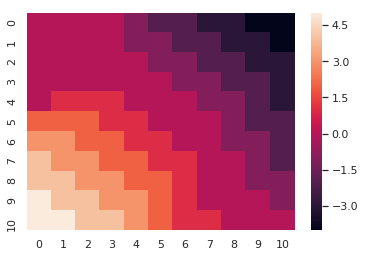

In [22]:
sns.set()
fig = plt.figure()
ax = sns.heatmap(pi_action.reshape(num_cars+1, num_cars+1))
fig.savefig('original jack problem.png')

### Modified problem

In [23]:
num_cars = 10
num_states = (num_cars + 1) * (num_cars + 1)

num_rentals_1 = 3
num_returns_1 = 3

num_rentals_2 = 4
num_returns_2 = 2

parking_space_limit = 5

r_rent = 10
r_move = -2
r_cars_more_than_5 = -4

max_move = 5

gamma = 0.9

In [24]:
def expected_return_modified(state, action, value_function):
    e_return = 0.0
    if action <=0:
        e_return += r_move * np.absolute(action)
    new_state = min(state[0] - action, num_cars), min(state[1] + action, num_cars)
    new_state = int(new_state[0]), int(new_state[1])
    if new_state[0] > parking_space_limit:
        e_return += r_cars_more_than_5
    if new_state[1] > parking_space_limit:
        e_return += r_cars_more_than_5
    for i in range(0, new_state[0] + 1):
        for j in range(0, new_state[1] + 1):
            p_rent = poisson(i, num_rentals_1) * poisson(j, num_rentals_2)
            rent_reward = (i + j) * r_rent
            for k in range(0, 11):
                for l in range(0, 11):
                    p_return = poisson(k, num_returns_1) * poisson(l, num_returns_2)
                    final_state = new_state[0] - i + k, new_state[1] - j + l
                    final_state = min(final_state[0], num_cars), min(final_state[1], num_cars)
                    n_s = final_state[0] * (num_cars + 1) + final_state[1]
                    e_return += p_return * p_rent * (rent_reward + gamma * value_function[int(n_s)])
    
    return e_return

In [ ]:
V_s = np.zeros((num_states,1)) # Value functions for all states
pi_action = np.zeros((num_cars + 1, num_cars + 1)) # Initial policy to not move any cars
tolerance = 1.0e-1

policy_stable = False
while not policy_stable:
    # Policy evaluation
    while True:
        delta = 0.0
        v_s = np.copy(V_s)
        V_s = np.zeros(V_s.shape)
        for i in range(num_cars + 1):
            for j in range(num_cars + 1):
                s = i * (num_cars + 1) + j
                V_s[s] = expected_return((i,j), pi_action[i,j], V_s)
                delta = max(delta, V_s[s] - v_s[s])
        if delta < tolerance:
            break
            
    print('Update value function for policy\n', V_s.reshape((num_cars + 1,num_cars + 1)))
    
    # Policy improvement
    old_policy = np.copy(pi_action)
    pi_action = np.zeros(pi_action.shape)
    for i in range(num_cars + 1):
        for j in range(num_cars + 1):
            s = i * (num_cars + 1) + j
            actions = np.arange(-max_move, max_move + 1)
            actions = np.reshape(actions, (actions.shape[0],1))
            all_return = np.zeros(actions.shape)
            for k in range(actions.shape[0]):
                if ((actions[k] >= 0 and i >= actions[k]) or (actions[k] < 0 and j >= np.absolute(actions[k]))):
                    all_return[k] = expected_return((i,j), actions[k], V_s)
                else:
                    all_return[k] = -np.inf
            pi_action[i,j] = actions[np.argmax(all_return)]
    
    print('Updated policy using new value function\n', pi_action.reshape(num_cars + 1, num_cars + 1))
    if np.all(pi_action == old_policy):
        print('\n\n***Found optimal policy***\n\n')
        break
    print('\n\n ***Iteration Complete, still searching for optimal policy***\n\n')

Update value function for policy
 [[0.00000000e+00 3.64643126e-02 1.82325596e-01 4.74083652e-01
  8.63191911e-01 1.25245145e+00 1.56404443e+00 1.77197599e+00
  1.89099401e+00 1.95067999e+00 1.97734863e+00]
 [2.73843741e-02 2.82814957e-01 1.08579509e+00 2.54781630e+00
  4.40497724e+00 6.21135405e+00 7.63448754e+00 8.57839708e+00
  9.12122426e+00 9.39882705e+00 9.52825420e+00]
 [1.10516959e-01 8.63466228e-01 2.99486518e+00 6.68766832e+00
  1.12629753e+01 1.56674100e+01 1.91436460e+01 2.14870081e+01
  2.28850654e+01 2.36494510e+01 2.40465709e+01]
 [2.39953347e-01 1.67960152e+00 5.53392157e+00 1.20324552e+01
  1.99977826e+01 2.76766833e+01 3.38235499e+01 3.80975988e+01
  4.07895559e+01 4.23890469e+01 4.33185029e+01]
 [3.78185205e-01 2.50493749e+00 8.02201136e+00 1.71860243e+01
  2.83779250e+01 3.92353369e+01 4.80810633e+01 5.44342276e+01
  5.86431806e+01 6.13216229e+01 6.30075739e+01]
 [4.91505527e-01 3.16042420e+00 9.96289938e+00 2.11752453e+01
  3.48677926e+01 4.82504632e+01 5.93346003e+

In [ ]:
sns.set()
fig = plt.figure()
ax = sns.heatmap(pi_action.reshape(num_cars+1, num_cars+1))
fig.savefig('4.7.png')